In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
import os,sys
sys.path.insert(0, os.path.abspath('.'))
print(sys.path)
from trace import Request, TraceConfig, generate_synthetic_reqs


['/home/shanyu/sglang/benchmark/multi-model', '/home/shanyu/miniconda3/envs/sgl/lib/python39.zip', '/home/shanyu/miniconda3/envs/sgl/lib/python3.9', '/home/shanyu/miniconda3/envs/sgl/lib/python3.9/lib-dynload', '', '/home/shanyu/miniconda3/envs/sgl/lib/python3.9/site-packages', '__editable__.sglang-0.2.10.finder.__path_hook__', '/home/shanyu/miniconda3/envs/sgl/lib/python3.9/site-packages/setuptools/_vendor']


In [4]:
import pandas as pd

In [5]:
MODELS = ["meta-llama/Llama-2-7b-chat-hf", "mistralai/Mistral-7B-Instruct-v0.2"]
SEED = 42
MODES = ["swap", "collocate", "single-model"]

In [6]:
def get_trace_config(req_rate, cv, alpha):
    trace_config = TraceConfig(
        req_rate=req_rate,
        duration=60*5,
        input_range=[8, 1024],
        output_range=[8, 512],
        model_paths=MODELS,
        seed=SEED,
        alpha=alpha,
        cv=cv,
    )
    return trace_config

In [7]:
def get_server_files(trace_config):
    server_file_names = {}
    now = "0822"
    for mode in MODES:
        filename = f"{now}_{mode}_duration-{trace_config.duration}_req_rate-{trace_config.req_rate}_alpha-{trace_config.alpha}_cv-{trace_config.cv}_input-{trace_config.input_range[0]}-{trace_config.input_range[1]}_output-{trace_config.output_range[0]}-{trace_config.output_range[1]}.log"
        path = os.path.join("server-logs", filename)
        server_file_names[mode] = path
    return server_file_names

In [11]:
def get_results(trace_config, days=["0823", "0824"]):
    request_tputs = {}
    for mode in MODES:
        filenames = []
        for day in days:
            filename = f"{day}_{mode}_duration_{trace_config.duration}_req_rate-{trace_config.req_rate}_alpha-{trace_config.alpha}_cv-{trace_config.cv}_input-{trace_config.input_range[0]}-{trace_config.input_range[1]}_output-{trace_config.output_range[0]}-{trace_config.output_range[1]}.json"
            path = os.path.join("benchmark-results", filename)
            filenames.append(path)
        for filename in filenames:
            try:
                with open(filename, "r") as f:
                    result = json.loads(f.readline())
                    request_tputs[mode] = result["request_throughput"]
            except:
                continue
        assert mode in request_tputs, f"Missing {mode} in {filenames}"
    return request_tputs

## Throughputs Analysis

### Proformance vs Request Rate and alpha (cv = 1)

In [12]:
result_data = []

req_rates = [1, 2, 4, 8, 16]
cv = 1
alphas = [0.1, 0.3, 0.6, 1]
for req_rate in req_rates:
    for alpha in alphas:
        trace_config = get_trace_config(req_rate, cv, alpha)
        request_tputs = get_results(trace_config)
        result_data.append(dict(req_rate=req_rate, alpha=alpha, cv=cv, **request_tputs))
        print(f"req_rate: {req_rate}, alpha: {alpha}, cv: {cv}")
        print(request_tputs)
        print("")


req_rate: 1, alpha: 0.1, cv: 1
{'swap': 0.8765454516758036, 'collocate': 0.9170839801671797, 'single-model': 0.9170311755907622}

req_rate: 1, alpha: 0.3, cv: 1
{'swap': 0.8800796521686486, 'collocate': 0.9118998965116019, 'single-model': 0.9171786894798442}

req_rate: 1, alpha: 0.6, cv: 1
{'swap': 0.8790964640861979, 'collocate': 0.9097127477633951, 'single-model': 0.9169576867846894}

req_rate: 1, alpha: 1, cv: 1
{'swap': 0.8818153421341288, 'collocate': 0.9103724828418124, 'single-model': 0.9170229319900285}

req_rate: 2, alpha: 0.1, cv: 1
{'swap': 1.9341351033819825, 'collocate': 2.0110757537660002, 'single-model': 2.0115563017342346}

req_rate: 2, alpha: 0.3, cv: 1
{'swap': 1.934622644247716, 'collocate': 2.0020647269971894, 'single-model': 2.010434978438911}

req_rate: 2, alpha: 0.6, cv: 1
{'swap': 1.934817505370182, 'collocate': 1.9930716846747756, 'single-model': 2.0110795550480054}

req_rate: 2, alpha: 1, cv: 1
{'swap': 1.932539927485509, 'collocate': 1.993097669935338, 'singl

In [26]:

req_rates = [1, 2, 4, 8, 16]
alpha = 1
cvs = [0.1, 2, 4]
for req_rate in req_rates:

    for cv in cvs:
        trace_config = get_trace_config(req_rate, cv, alpha)
        request_tputs = get_results(trace_config)
        result_data.append(dict(req_rate=req_rate, alpha=alpha, cv=cv, **request_tputs))

        print(f"req_rate: {req_rate}, alpha: {alpha}, cv: {cv}")
        print(request_tputs)
        print("")

req_rate: 1, alpha: 1, cv: 0.1
{'swap': 0.9605742315276623, 'collocate': 0.9926673459222816, 'single-model': 0.9933420233043626}

req_rate: 1, alpha: 1, cv: 2
{'swap': 0.9844877830467151, 'collocate': 1.0082252838299826, 'single-model': 1.0172150279892587}

req_rate: 1, alpha: 1, cv: 4
{'swap': 1.0394381880053438, 'collocate': 1.0688041997044508, 'single-model': 1.0835628069224017}

req_rate: 2, alpha: 1, cv: 0.1
{'swap': 1.8977886914360955, 'collocate': 1.9601786496934024, 'single-model': 1.9738179134326443}

req_rate: 2, alpha: 1, cv: 2
{'swap': 1.9068946402653868, 'collocate': 1.9737316110998413, 'single-model': 1.986086032652301}

req_rate: 2, alpha: 1, cv: 4
{'swap': 1.8201291046495773, 'collocate': 1.842159763658913, 'single-model': 1.8425405929150291}

req_rate: 4, alpha: 1, cv: 0.1
{'swap': 3.803381595768303, 'collocate': 3.9097903976390285, 'single-model': 3.9504669211420724}

req_rate: 4, alpha: 1, cv: 2
{'swap': 3.9199158238308227, 'collocate': 4.04591440196782, 'single-mode

In [27]:
df = pd.DataFrame(result_data)

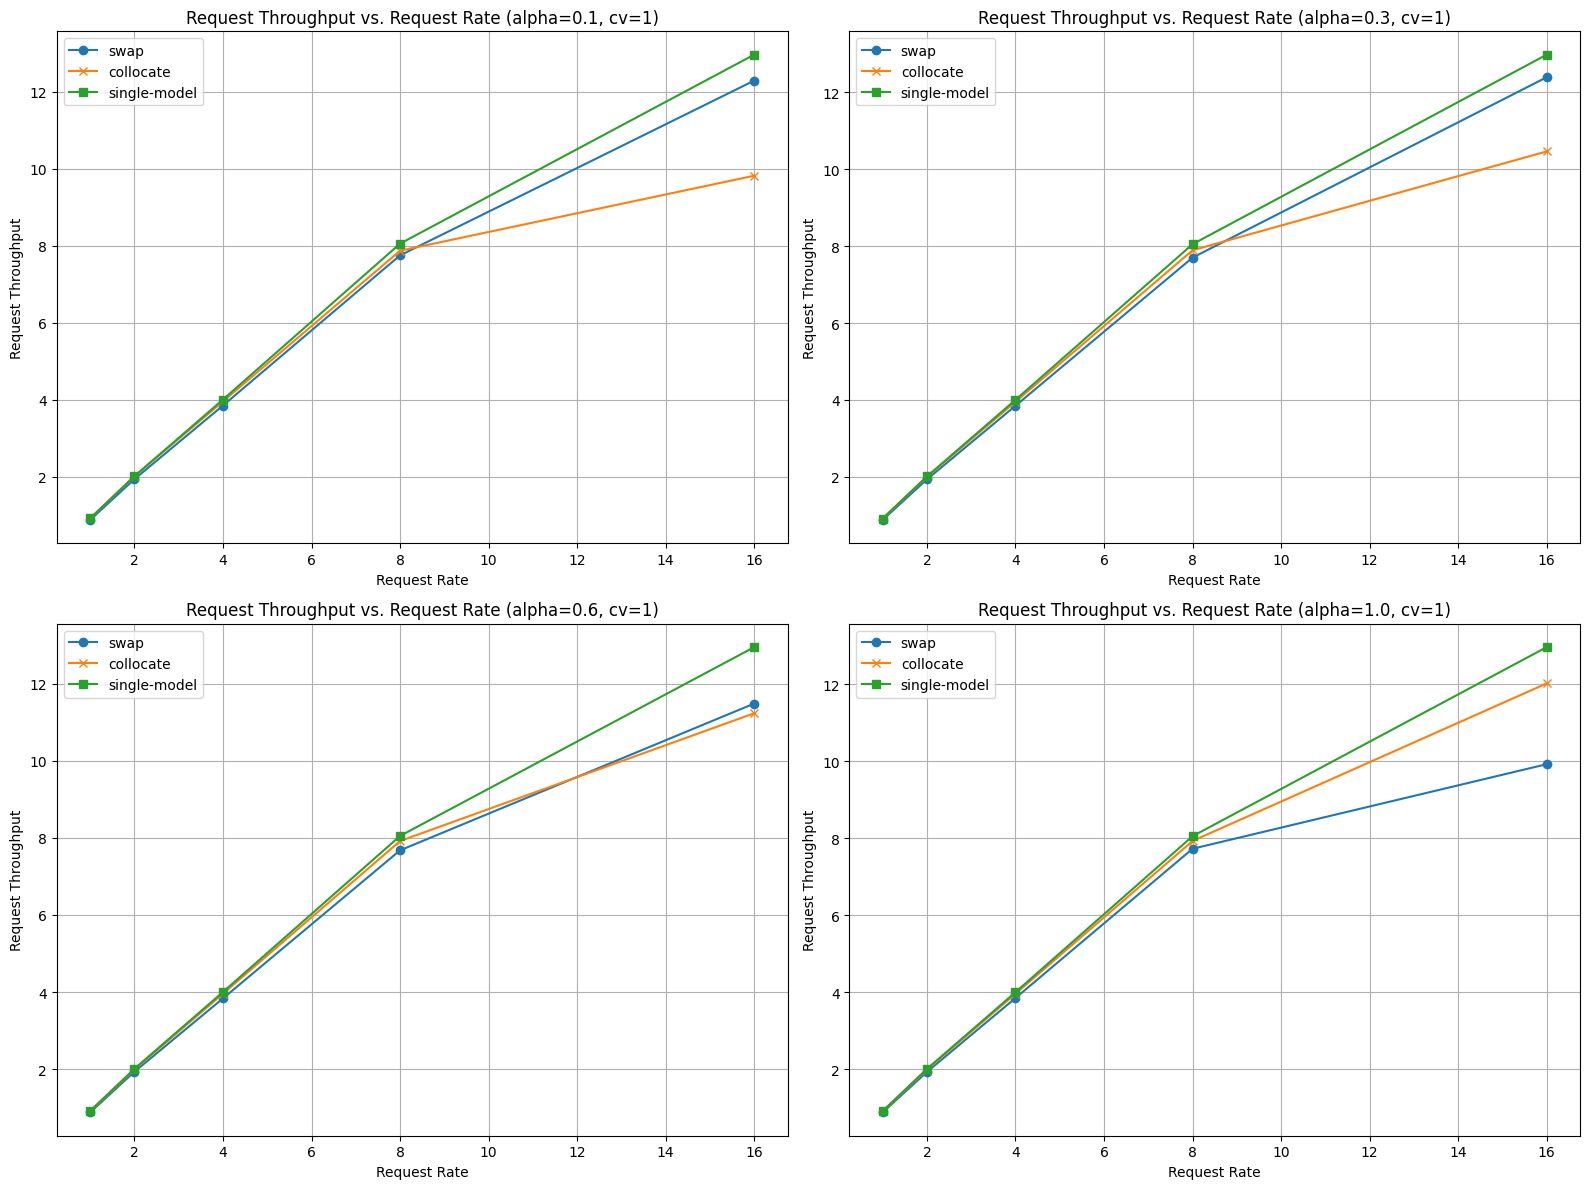

In [20]:
import matplotlib.pyplot as plt

# Get the unique alpha values
alpha_values = sorted(df['alpha'].unique())

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten the 2x2 array for easier iteration

# Loop through each alpha value and corresponding subplot axis
for i, alpha in enumerate(alpha_values):
    subset = df[(df['alpha'] == alpha) & (df['cv'] == 1)]  # Filter by alpha and cv
    ax = axes[i]  # Select the current subplot
    
    # Plot the data
    ax.plot(subset['req_rate'], subset['swap'], label='swap', marker='o')
    ax.plot(subset['req_rate'], subset['collocate'], label='collocate', marker='x')
    ax.plot(subset['req_rate'], subset['single-model'], label='single-model', marker='s')

    # Set labels and title for each subplot
    ax.set_xlabel('Request Rate')
    ax.set_ylabel('Request Throughput')
    ax.set_title(f'Request Throughput vs. Request Rate (alpha={alpha}, cv=1)')
    ax.legend()
    ax.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


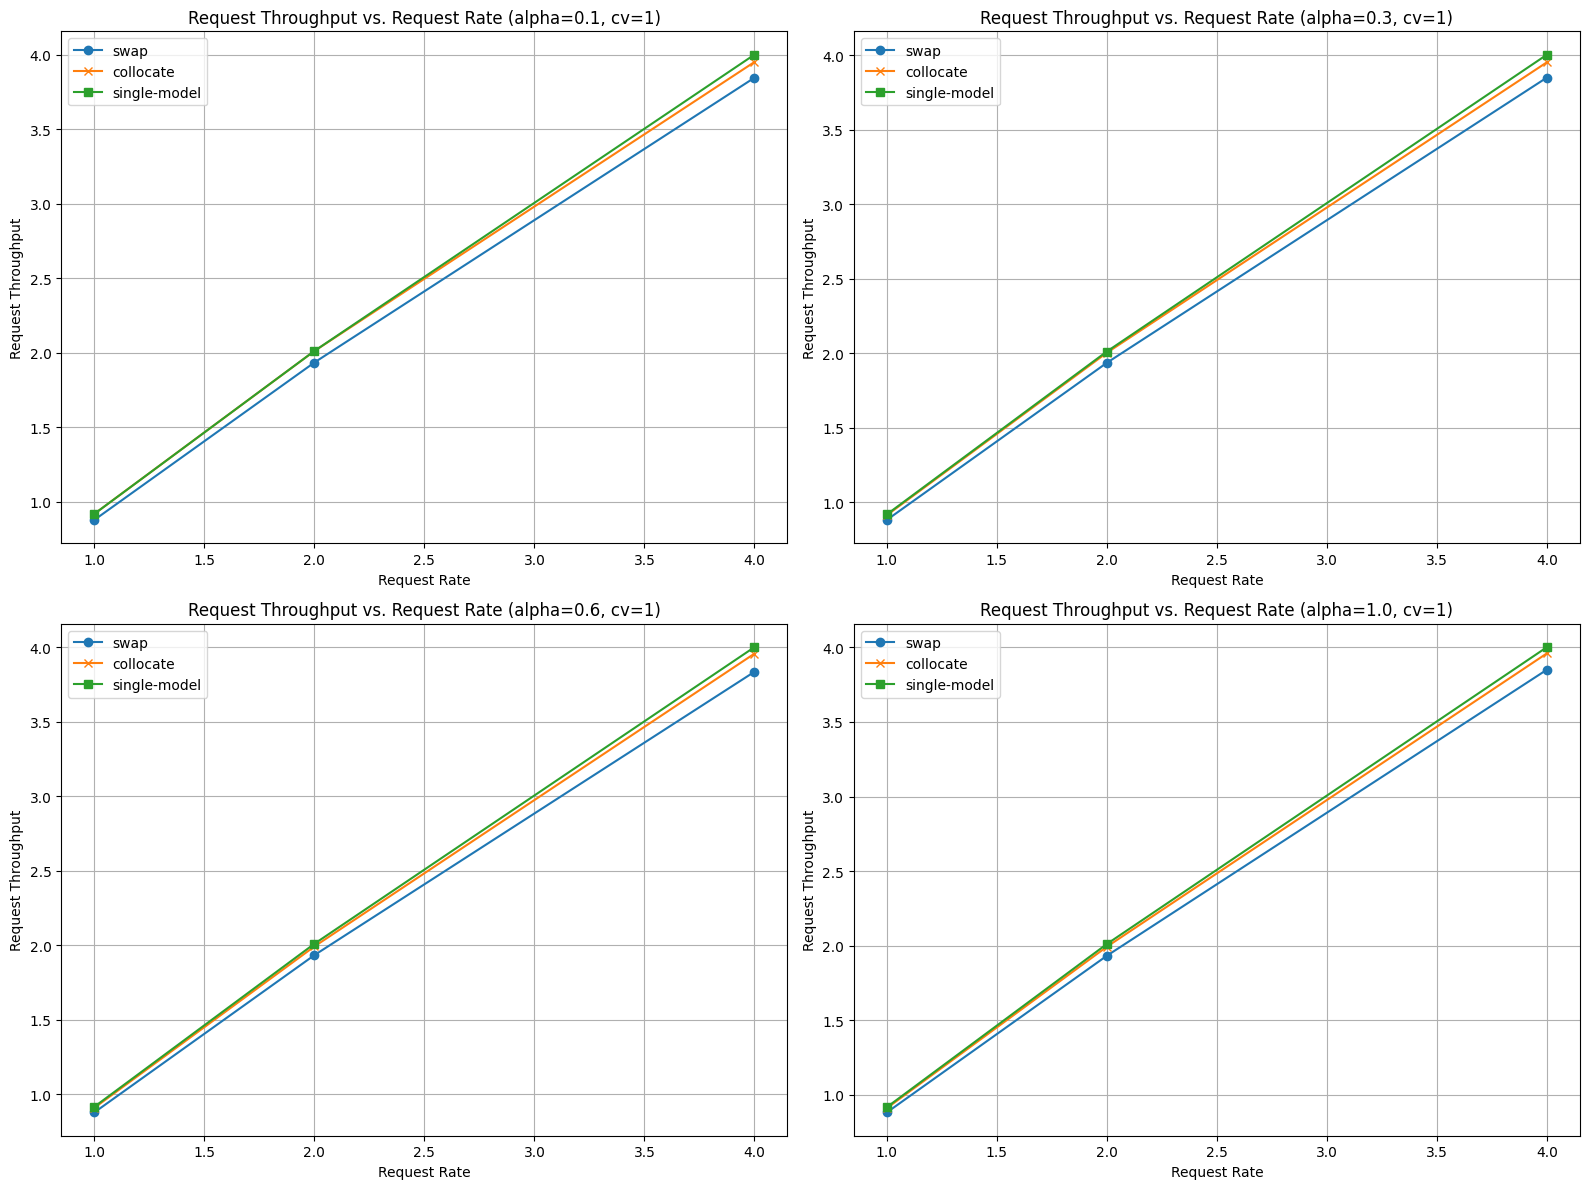

In [21]:
import matplotlib.pyplot as plt

# Get the unique alpha values
alpha_values = sorted(df['alpha'].unique())

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten the 2x2 array for easier iteration

# Loop through each alpha value and corresponding subplot axis
for i, alpha in enumerate(alpha_values):
    subset = df[(df['alpha'] == alpha) & (df['cv'] == 1)& (df['req_rate'] <=4)]  # Filter by alpha and cv
    ax = axes[i]  # Select the current subplot
    
    # Plot the data
    ax.plot(subset['req_rate'], subset['swap'], label='swap', marker='o')
    ax.plot(subset['req_rate'], subset['collocate'], label='collocate', marker='x')
    ax.plot(subset['req_rate'], subset['single-model'], label='single-model', marker='s')

    # Set labels and title for each subplot
    ax.set_xlabel('Request Rate')
    ax.set_ylabel('Request Throughput')
    ax.set_title(f'Request Throughput vs. Request Rate (alpha={alpha}, cv=1)')
    ax.legend()
    ax.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

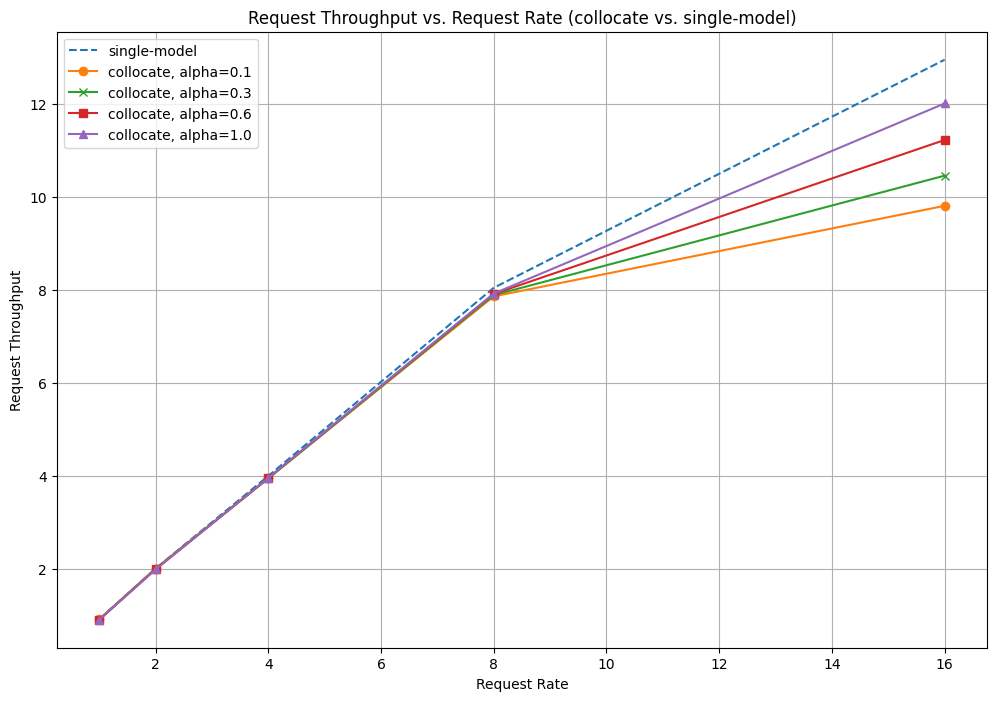

In [25]:
# collocate in each alpha vs single model
import matplotlib.pyplot as plt

# Get the unique alpha values
alpha_values = sorted(df['alpha'].unique())

plt.figure(figsize=(12, 8))
plt.plot(subset['req_rate'], subset['single-model'], label='single-model', linestyle='--')

markers = ['o', 'x', 's', '^']
for i, alpha in enumerate(alpha_values):
    subset = df[(df['alpha'] == alpha) & (df['cv'] == 1)]  # Filter by alpha and cv
    plt.plot(subset['req_rate'], subset['collocate'], label=f'collocate, alpha={alpha}', marker=markers[i])
plt.xlabel('Request Rate')
plt.ylabel('Request Throughput')
plt.title('Request Throughput vs. Request Rate (collocate vs. single-model)')
plt.legend()
plt.grid(True)

plt.show()

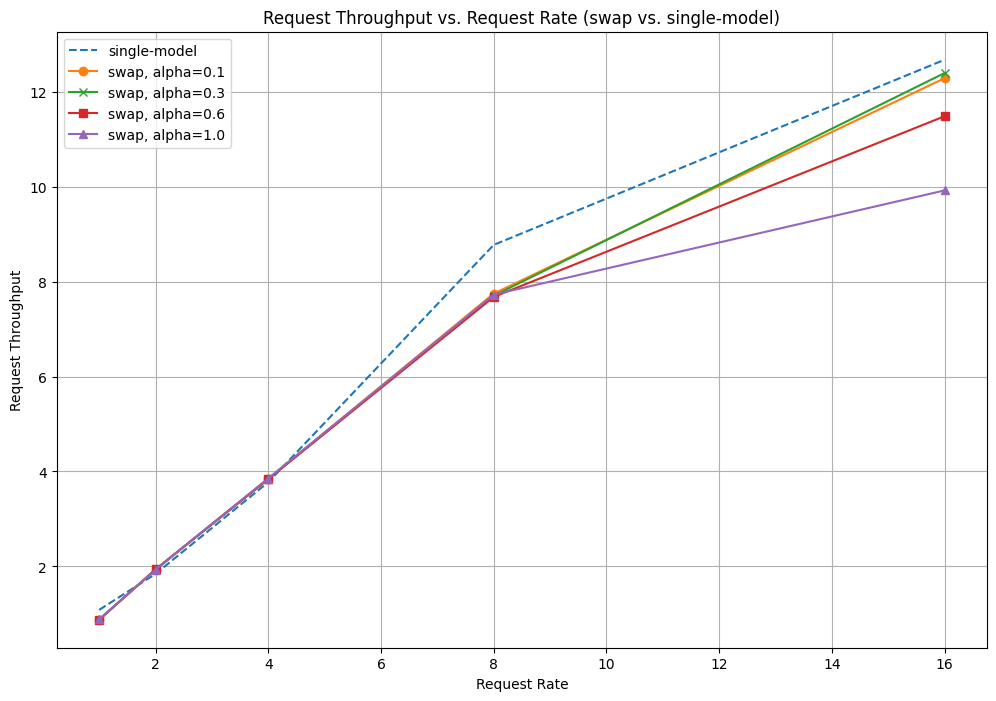

In [35]:
# swap in each alpha vs single model

# Get the unique alpha values
alpha_values = sorted(df['alpha'].unique())

plt.figure(figsize=(12, 8))
plt.plot(subset['req_rate'], subset['single-model'], label='single-model', linestyle='--')

markers = ['o', 'x', 's', '^']
for i, alpha in enumerate(alpha_values):
    subset = df[(df['alpha'] == alpha) & (df['cv'] == 1)]  # Filter by alpha and cv
    plt.plot(subset['req_rate'], subset['swap'], label=f'swap, alpha={alpha}', marker=markers[i])
plt.xlabel('Request Rate')
plt.ylabel('Request Throughput')
plt.title('Request Throughput vs. Request Rate (swap vs. single-model)')
plt.legend()
plt.grid(True)

plt.show()

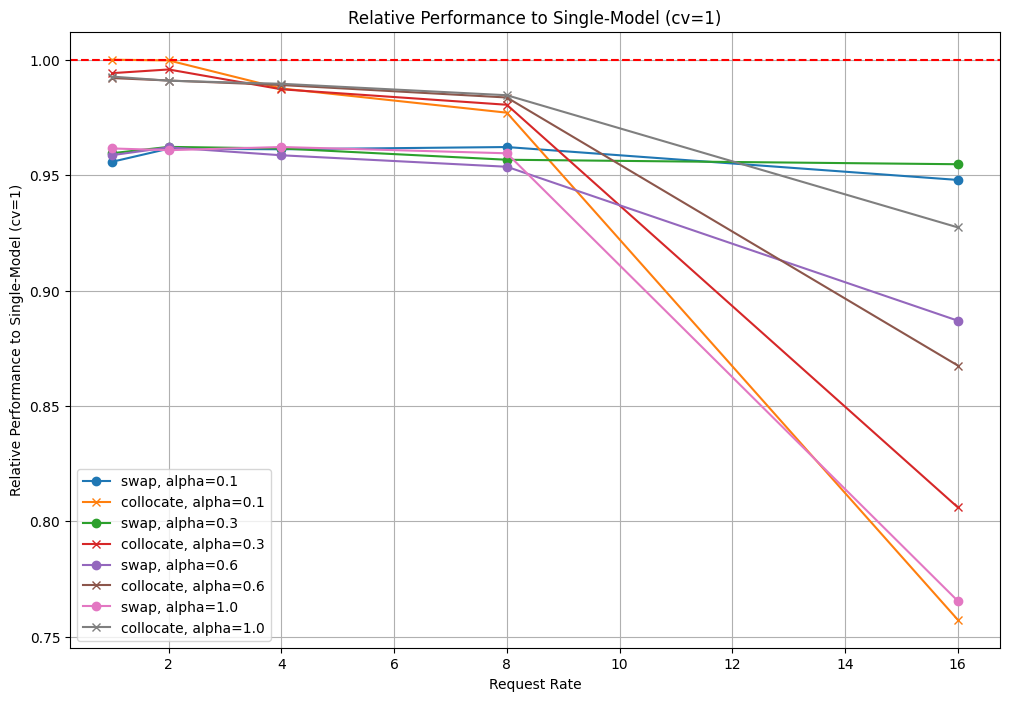

In [16]:
# 3. Relative Performance to Single-Model
df['swap_relative'] = df['swap'] / df['single-model']
df['collocate_relative'] = df['collocate'] / df['single-model']

plt.figure(figsize=(12, 8))
for alpha in df['alpha'].unique():
    subset = df[(df['alpha'] == alpha) & (df['cv'] == 1)]
    plt.plot(subset['req_rate'], subset['swap_relative'], label=f'swap, alpha={alpha}', marker='o')
    plt.plot(subset['req_rate'], subset['collocate_relative'], label=f'collocate, alpha={alpha}', marker='x')

plt.axhline(1, color='red', linestyle='--')


plt.xlabel('Request Rate')
plt.ylabel('Relative Performance to Single-Model (cv=1)')
plt.title('Relative Performance to Single-Model (cv=1)')
plt.legend()
plt.grid(True)
plt.show()

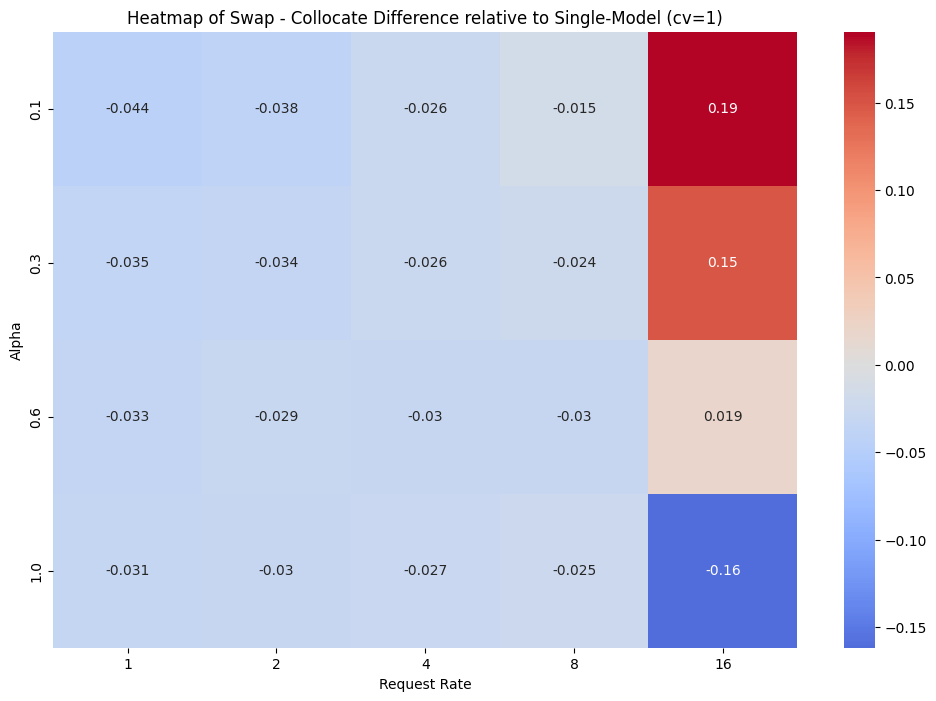

In [17]:
import seaborn as sns

df['swap_collocate_relative_diff'] = df['swap_relative'] - df['collocate_relative']
# df['swap_collocate_diff_relative'] = (df['swap'] - df['collocate'])/ df['single-model']


pivot_table = df.pivot_table(index='alpha', columns='req_rate', values='swap_collocate_relative_diff')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Swap - Collocate Difference relative to Single-Model (cv=1)')
plt.xlabel('Request Rate')
plt.ylabel('Alpha')
plt.show()

### Proformance vs Request Rate and cv (alpha = 1)

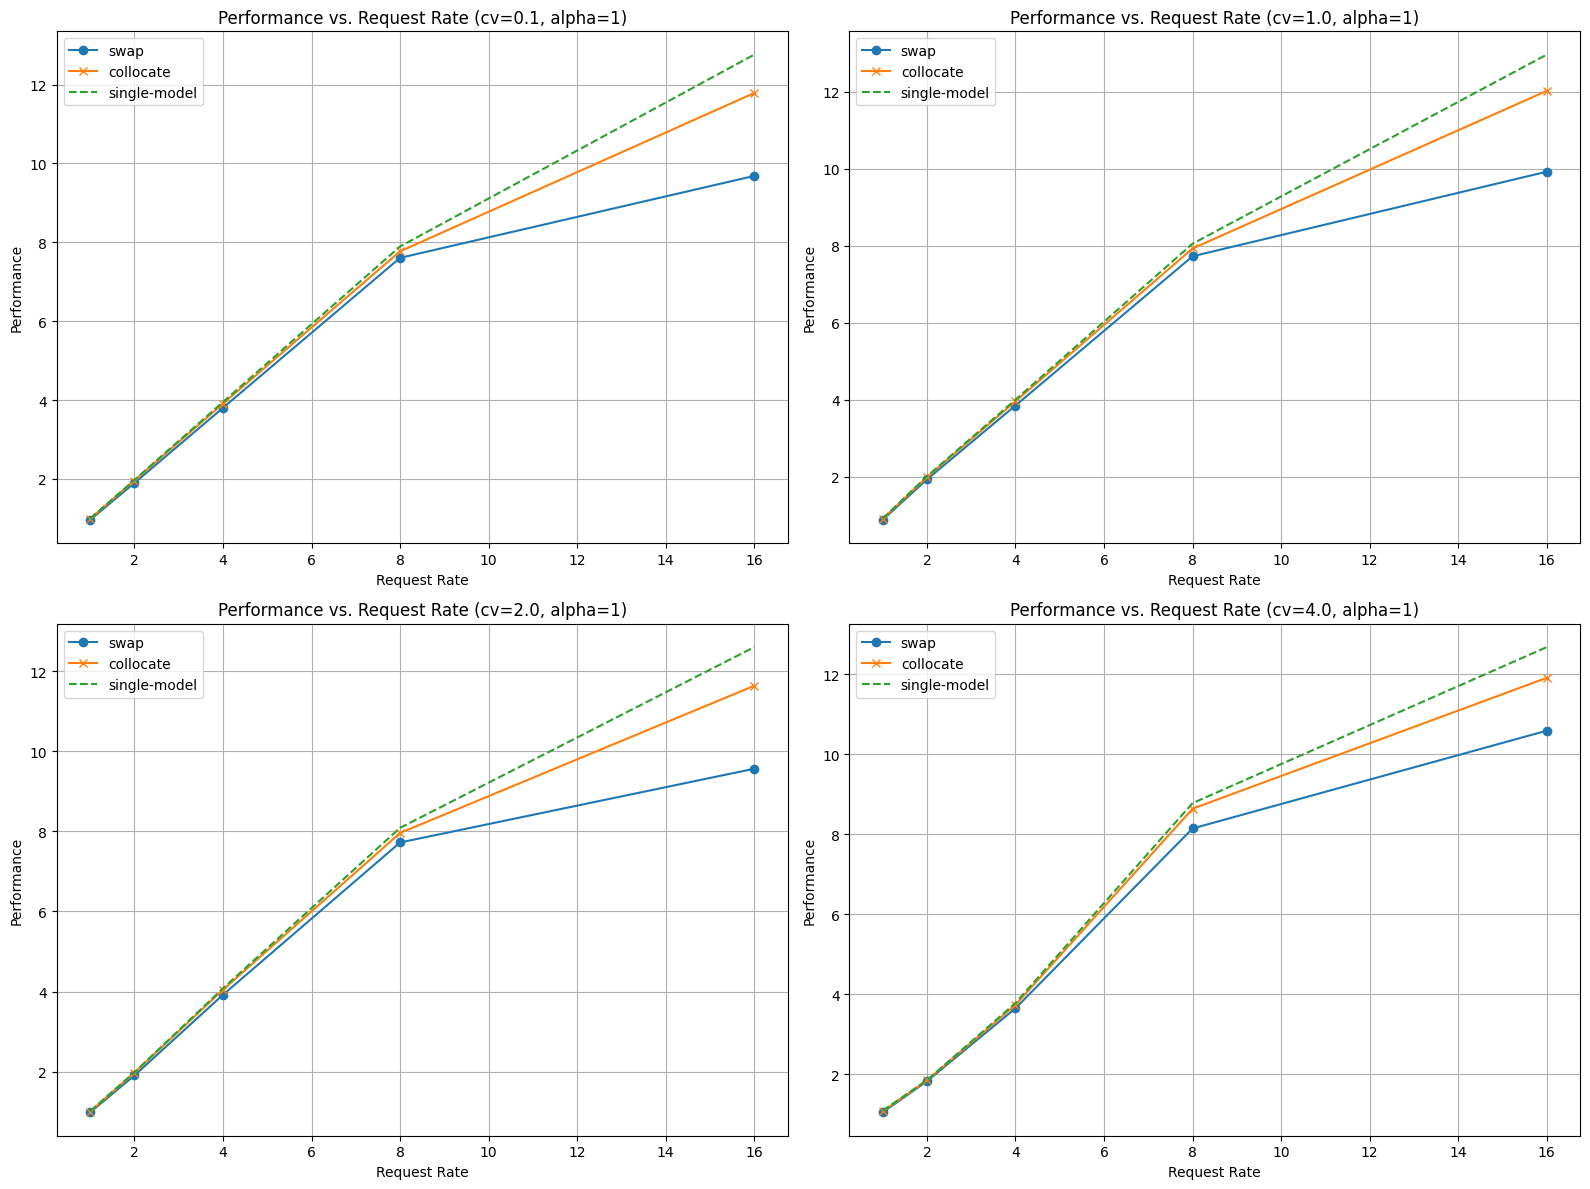

In [28]:
import matplotlib.pyplot as plt

# Get the unique cv values
cv_values = sorted(df['cv'].unique())

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten the 2x2 array for easier iteration

# Loop through each cv value and corresponding subplot axis
for i, cv in enumerate(cv_values):
    subset = df[(df['cv'] == cv) & (df['alpha'] == 1)]  # Filter by alpha and cv
    ax = axes[i]  # Select the current subplot
    
    # Plot the data
    ax.plot(subset['req_rate'], subset['swap'], label='swap', marker='o')
    ax.plot(subset['req_rate'], subset['collocate'], label='collocate', marker='x')
    ax.plot(subset['req_rate'], subset['single-model'], label='single-model', linestyle='--')

    # Set labels and title for each subplot
    ax.set_xlabel('Request Rate')
    ax.set_ylabel('Performance')
    ax.set_title(f'Performance vs. Request Rate (cv={cv}, alpha=1)')
    ax.legend()
    ax.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


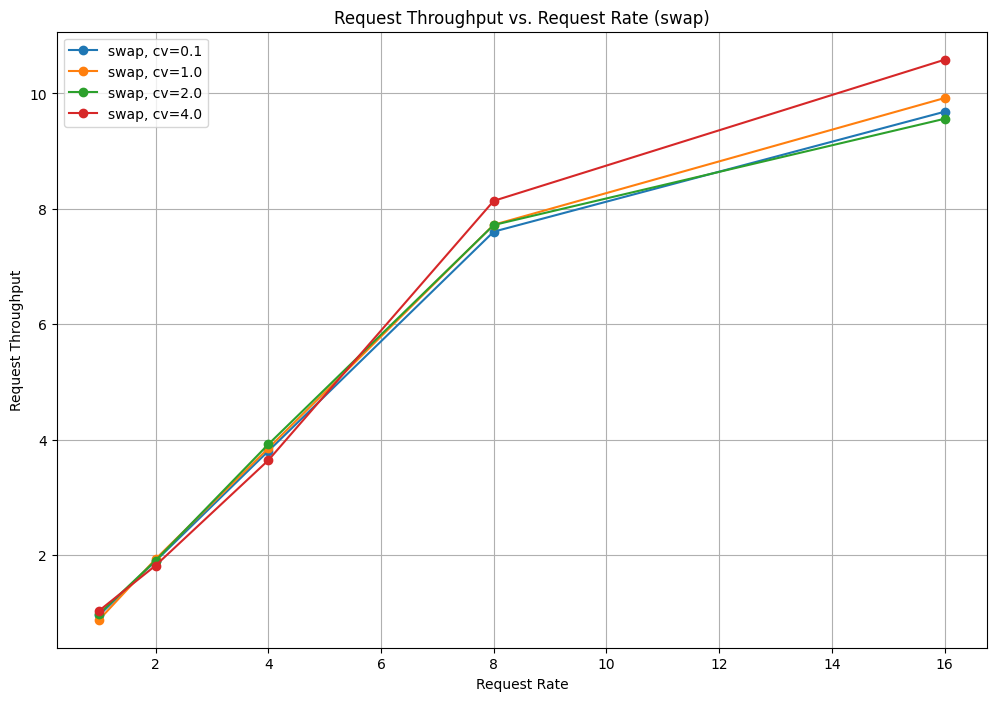

In [34]:
# swap under different CV
from matplotlib import pyplot as plt

# Get the unique cv values
cv_values = sorted(df['cv'].unique())

plt.figure(figsize=(12, 8))

for cv in cv_values:
    subset = df[(df['cv'] == cv) & (df['alpha'] == 1)]  # Filter by alpha and cv
    plt.plot(subset['req_rate'], subset['swap'], label=f'swap, cv={cv}', marker='o')

plt.xlabel('Request Rate')
plt.ylabel('Request Throughput')
plt.title('Request Throughput vs. Request Rate (swap)')
plt.legend()
plt.grid(True)

plt.show()

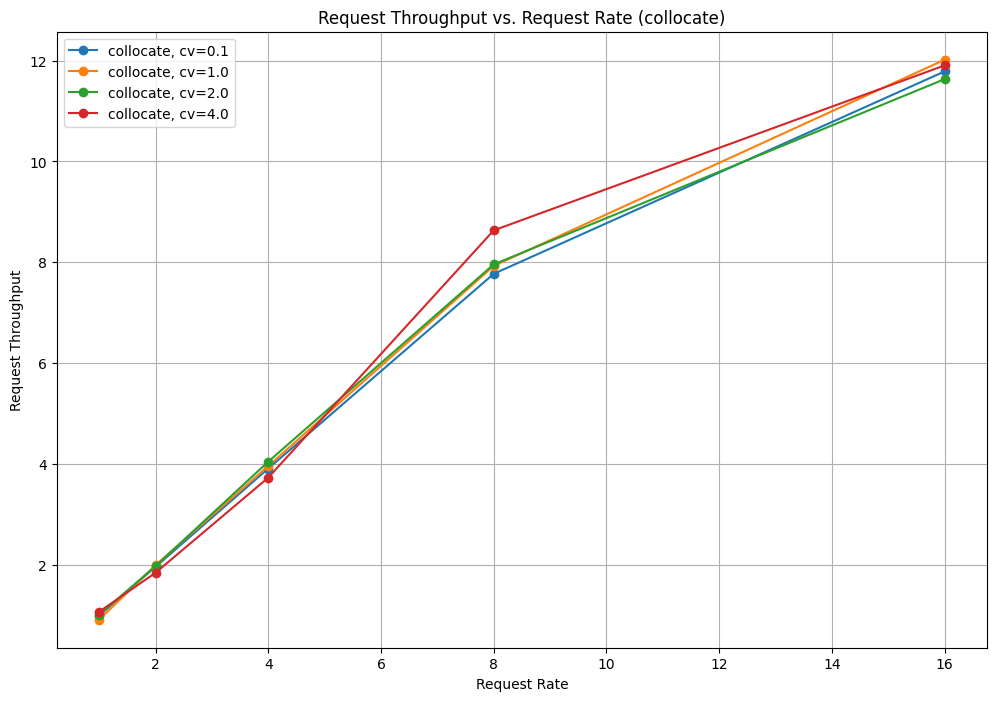

In [36]:
# collocate under different CV
from matplotlib import pyplot as plt

# Get the unique cv values
cv_values = sorted(df['cv'].unique())

plt.figure(figsize=(12, 8))

for cv in cv_values:
    subset = df[(df['cv'] == cv) & (df['alpha'] == 1)]  # Filter by alpha and cv
    plt.plot(subset['req_rate'], subset['collocate'], label=f'collocate, cv={cv}', marker='o')

plt.xlabel('Request Rate')
plt.ylabel('Request Throughput')
plt.title('Request Throughput vs. Request Rate (collocate)')
plt.legend()
plt.grid(True)

plt.show()

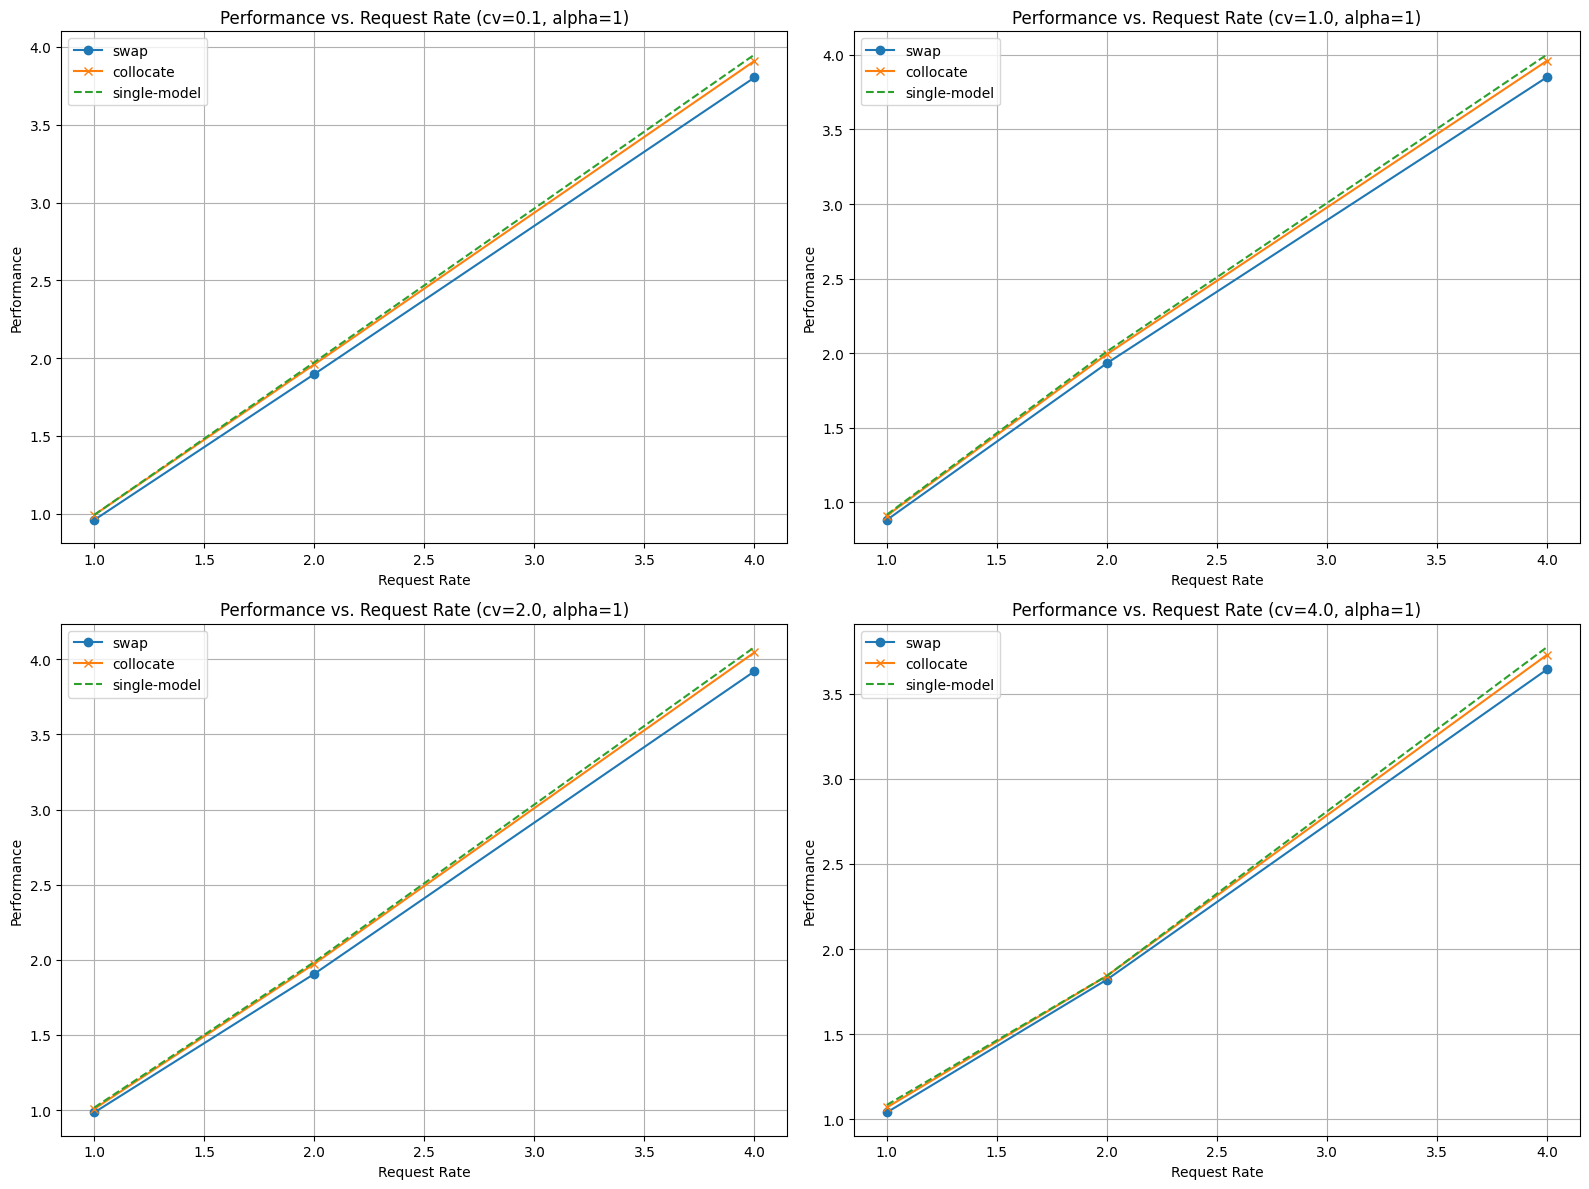

In [33]:
import matplotlib.pyplot as plt

# Get the unique cv values
cv_values = sorted(df['cv'].unique())

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten the 2x2 array for easier iteration

# Loop through each cv value and corresponding subplot axis
for i, cv in enumerate(cv_values):
    subset = df[(df['cv'] == cv) & (df['alpha'] == 1) & (df['req_rate'] <=4)]  # Filter by alpha and cv
    ax = axes[i]  # Select the current subplot
    
    # Plot the data
    ax.plot(subset['req_rate'], subset['swap'], label='swap', marker='o')
    ax.plot(subset['req_rate'], subset['collocate'], label='collocate', marker='x')
    ax.plot(subset['req_rate'], subset['single-model'], label='single-model', linestyle='--')

    # Set labels and title for each subplot
    ax.set_xlabel('Request Rate')
    ax.set_ylabel('Performance')
    ax.set_title(f'Performance vs. Request Rate (cv={cv}, alpha=1)')
    ax.legend()
    ax.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

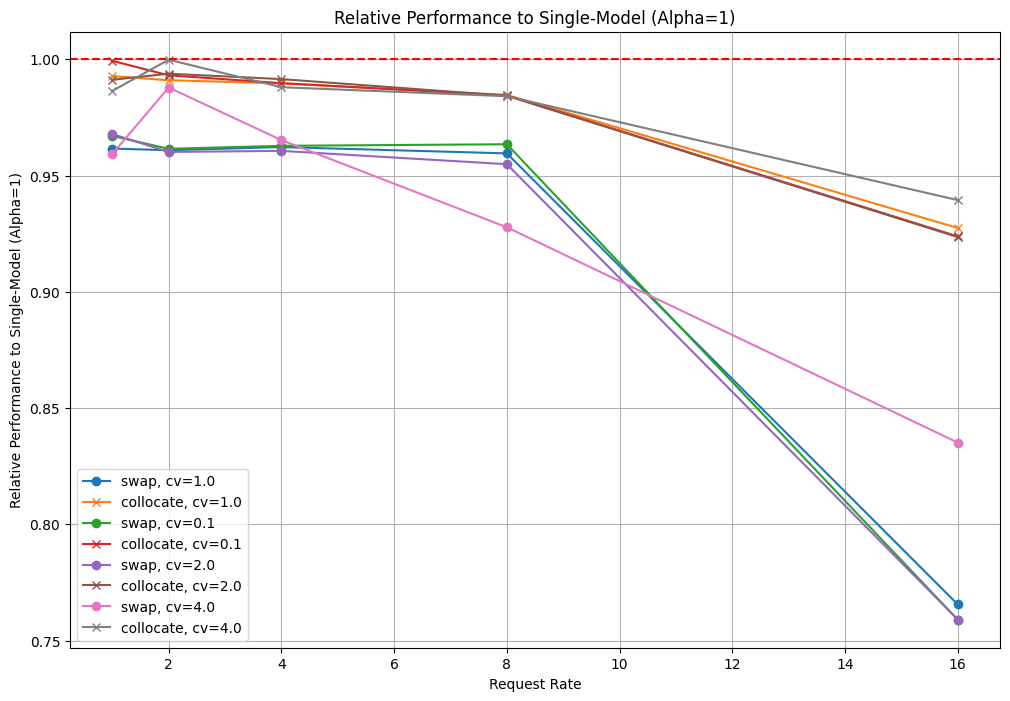

In [29]:
# 3. Relative Performance to Single-Model
df['swap_relative'] = df['swap'] / df['single-model']
df['collocate_relative'] = df['collocate'] / df['single-model']

plt.figure(figsize=(12, 8))
for cv in df['cv'].unique():
    subset = df[(df['cv'] == cv) & (df['alpha'] == 1)]
    plt.plot(subset['req_rate'], subset['swap_relative'], label=f'swap, cv={cv}', marker='o')
    plt.plot(subset['req_rate'], subset['collocate_relative'], label=f'collocate, cv={cv}', marker='x')

plt.axhline(1, color='red', linestyle='--')

plt.xlabel('Request Rate')
plt.ylabel('Relative Performance to Single-Model (Alpha=1)')
plt.title('Relative Performance to Single-Model (Alpha=1)')
plt.legend()
plt.grid(True)
plt.show()

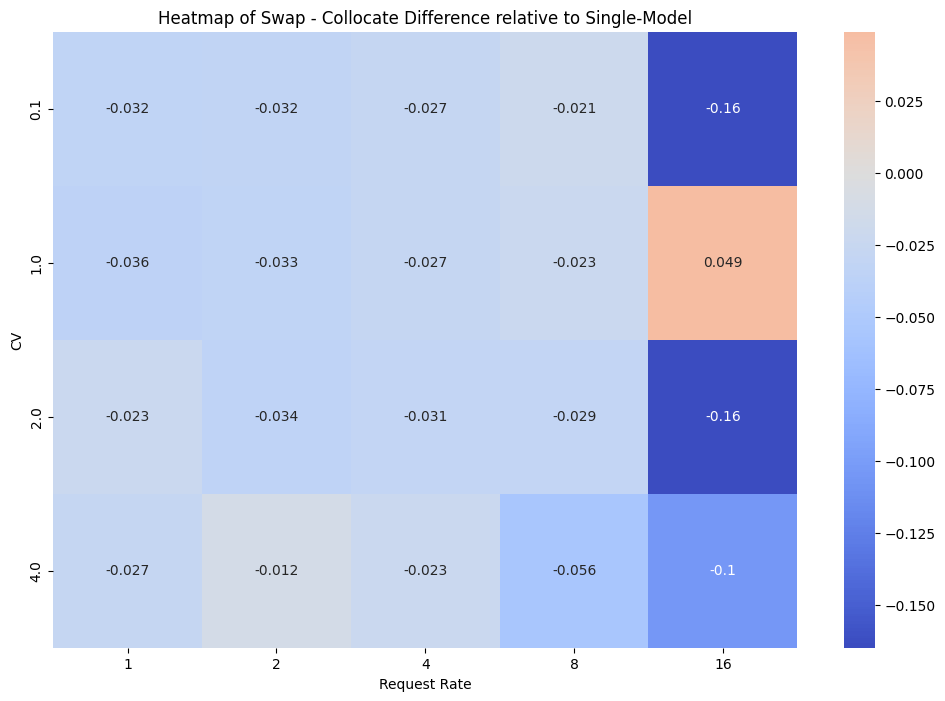

In [31]:
import seaborn as sns

# df['swap_collocate_relative_diff'] = df['swap_relative'] - df['collocate_relative']
df['swap_collocate_diff_relative'] = (df['swap'] - df['collocate'])/ df['single-model']


pivot_table = df.pivot_table(index='cv', columns='req_rate', values='swap_collocate_relative_diff')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Swap - Collocate Difference relative to Single-Model')
plt.xlabel('Request Rate')
plt.ylabel('CV')
plt.show()

## req_rate = 1, cv = 1, alpha = 1 (collocate better)

In [65]:
req_rate = 1
cv = 1
alpha = 1

In [66]:
req_rate = 1
cv = 1
alpha = 4

trace_config = get_trace_config(req_rate, cv, alpha)
trace = generate_synthetic_reqs(trace_config)

num_reqs_model = {}
for model in MODELS:
    num_reqs_model[model] = 0

for req in trace:
    num_reqs_model[req.model] += 1

print(num_reqs_model)
ratio = num_reqs_model[MODELS[0]] / num_reqs_model[MODELS[1]]
print(f"actual ratio: {ratio}")

p1 = (1/2)**alpha
p2 = 1 - p1
print(f"computed ratio: {p1/p2}")
print(f"p1: {p1}, p2: {p2}")
mem_frac = [0.8*p1, 0.8*p2 / (1-p1)]
print(f"mem_frac: {mem_frac}")

{'meta-llama/Llama-2-7b-chat-hf': 20, 'mistralai/Mistral-7B-Instruct-v0.2': 280}
actual ratio: 0.07142857142857142
computed ratio: 0.06666666666666667
p1: 0.0625, p2: 0.9375
mem_frac: [0.05, 0.8]


Text(0.5, 1.0, 'Synthetic Requests: Request Rate=1, CV=1, Alpha=4')

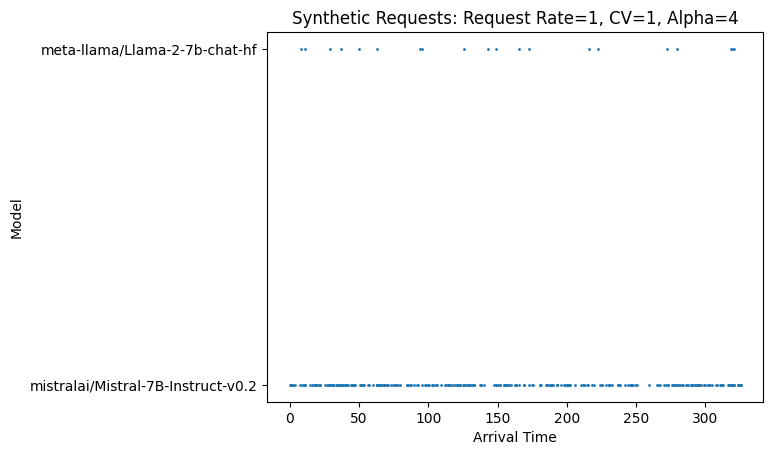

In [67]:
trace_config = get_trace_config(req_rate, cv, alpha)
trace = generate_synthetic_reqs(trace_config)
# plot the requests for each model, by arrival time
plt.scatter(
    [req.arrival_time for req in trace],
    [req.model for req in trace],
    s=1,
)
plt.xlabel('Arrival Time')
plt.ylabel('Model')
plt.title(f'Synthetic Requests: Request Rate={req_rate}, CV={cv}, Alpha={alpha}')

In [68]:
server_file_names = get_server_files(trace_config)

In [69]:
log_file_path = server_file_names['swap']

In [70]:
log_file_path

'server-logs/0822_swap_duration-300_req_rate-1_alpha-4_cv-1_input-8-1024_output-8-512.log'

In [71]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Path to the log file

# Compile regex patterns for parsing
decode_pattern = re.compile(r'(?P<timestamp>\d+:\d+:\d+,\d+).* \[(?P<model_name>[^\]]+)\]\[gpu=.*?] Decode batch\. #running-req: (?P<running_req>\d+),')
switch_decision_pattern = re.compile(r'(?P<timestamp>\d+:\d+:\d+,\d+).*Prepare to switch (?P<action>on|off) model (?P<model_name>[^\s]+)')
switch_action_pattern = re.compile(r'(?P<timestamp>\d+:\d+:\d+,\d+).*Start switching (?P<action>on|off) model\.')

# Store parsed data
decode_data = []
switch_decisions = []
switch_actions = []

# Read and parse the log file
with open(log_file_path, 'r') as file:
    for line in file:
        print 
        decode_match = decode_pattern.search(line)
        if decode_match:
            timestamp = datetime.strptime(decode_match.group('timestamp'), '%H:%M:%S,%f')
            model_name = decode_match.group('model_name')
            running_req = int(decode_match.group('running_req'))
            decode_data.append([timestamp, model_name, running_req])
        
        switch_decision_match = switch_decision_pattern.search(line)
        if switch_decision_match:
            timestamp = datetime.strptime(switch_decision_match.group('timestamp'), '%H:%M:%S,%f')
            action = switch_decision_match.group('action')
            model_name = switch_decision_match.group('model_name')
            switch_decisions.append([timestamp, action, model_name])
        
        switch_action_match = switch_action_pattern.search(line)
        if switch_action_match:
            timestamp = datetime.strptime(switch_action_match.group('timestamp'), '%H:%M:%S,%f')
            action = switch_action_match.group('action')
            switch_actions.append([timestamp, action])

# Convert decode data to a DataFrame
df = pd.DataFrame(decode_data, columns=['timestamp', 'model_name', 'running_req'])

# Plot the data
plt.figure(figsize=(10, 6))
for model_name in df['model_name'].unique():
    model_df = df[df['model_name'] == model_name]
    plt.plot(model_df['timestamp'], model_df['running_req'], label=model_name)

# Add vertical lines for switch decisions
# for decision in switch_decisions:
#     plt.axvline(decision[0], color='blue', linestyle='--', label=f'{decision[1].capitalize()} {decision[2]}')

# Add shaded regions for switch actions
for action in switch_actions:
    if action[1] == 'on':
        plt.axvspan(action[0], action[0] + pd.Timedelta(seconds=1), color='green', alpha=0.3, label='Switch On')
    elif action[1] == 'off':
        plt.axvspan(action[0], action[0] + pd.Timedelta(seconds=1), color='red', alpha=0.3, label='Switch Off')

# Formatting plot
plt.xlabel('Timestamp')
plt.ylabel('Running Requests')
plt.title('Running Requests over Time by Model')
# plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'server-logs/0822_swap_duration-300_req_rate-1_alpha-4_cv-1_input-8-1024_output-8-512.log'

In [ ]:
log_file_path = server_file_names['single-model']

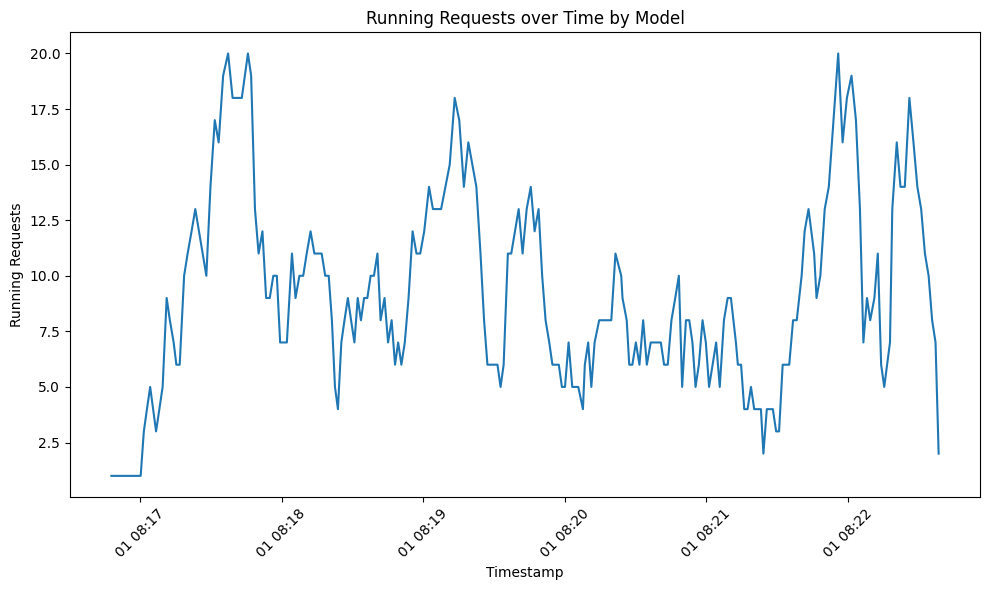

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Path to the log file

# Compile regex patterns for parsing
decode_pattern = re.compile(r'(?P<timestamp>\d+:\d+:\d+,\d+).* \[(?P<model_name>[^\]]+)\]\[gpu=.*?] Decode batch\. #running-req: (?P<running_req>\d+),')
switch_decision_pattern = re.compile(r'(?P<timestamp>\d+:\d+:\d+,\d+).*Prepare to switch (?P<action>on|off) model (?P<model_name>[^\s]+)')
switch_action_pattern = re.compile(r'(?P<timestamp>\d+:\d+:\d+,\d+).*Start switching (?P<action>on|off) model\.')

# Store parsed data
decode_data = []
switch_decisions = []
switch_actions = []

# Read and parse the log file
with open(log_file_path, 'r') as file:
    for line in file:
        print 
        decode_match = decode_pattern.search(line)
        if decode_match:
            timestamp = datetime.strptime(decode_match.group('timestamp'), '%H:%M:%S,%f')
            model_name = decode_match.group('model_name')
            running_req = int(decode_match.group('running_req'))
            decode_data.append([timestamp, model_name, running_req])
        
        switch_decision_match = switch_decision_pattern.search(line)
        if switch_decision_match:
            timestamp = datetime.strptime(switch_decision_match.group('timestamp'), '%H:%M:%S,%f')
            action = switch_decision_match.group('action')
            model_name = switch_decision_match.group('model_name')
            switch_decisions.append([timestamp, action, model_name])
        
        switch_action_match = switch_action_pattern.search(line)
        if switch_action_match:
            timestamp = datetime.strptime(switch_action_match.group('timestamp'), '%H:%M:%S,%f')
            action = switch_action_match.group('action')
            switch_actions.append([timestamp, action])

# Convert decode data to a DataFrame
df = pd.DataFrame(decode_data, columns=['timestamp', 'model_name', 'running_req'])

# Plot the data
plt.figure(figsize=(10, 6))
for model_name in df['model_name'].unique():
    model_df = df[df['model_name'] == model_name]
    plt.plot(model_df['timestamp'], model_df['running_req'], label=model_name)

# Add vertical lines for switch decisions
# for decision in switch_decisions:
#     plt.axvline(decision[0], color='blue', linestyle='--', label=f'{decision[1].capitalize()} {decision[2]}')

# Add shaded regions for switch actions
# for action in switch_actions:
#     if action[1] == 'on':
#         plt.axvspan(action[0], action[0] + pd.Timedelta(seconds=1), color='green', alpha=0.3, label='Switch On')
#     elif action[1] == 'off':
        # plt.axvspan(action[0], action[0] + pd.Timedelta(seconds=1), color='red', alpha=0.3, label='Switch Off')
        

# Formatting plot
plt.xlabel('Timestamp')
plt.ylabel('Running Requests')
plt.title('Running Requests over Time by Model')
# plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
decode_data

[[datetime.datetime(1900, 1, 1, 8, 16, 47, 863000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 48, 977000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 50, 910000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 51, 203000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 52, 321000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 53, 440000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 54, 563000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 55, 690000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 56, 814000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 57, 941000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 16, 59, 690000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 17, 0, 278000), 'Llama-2-7b-chat-hf', 1],
 [datetime.datetime(1900, 1, 1, 8, 17, 1, 615000), 'Llama-2-7b-ch

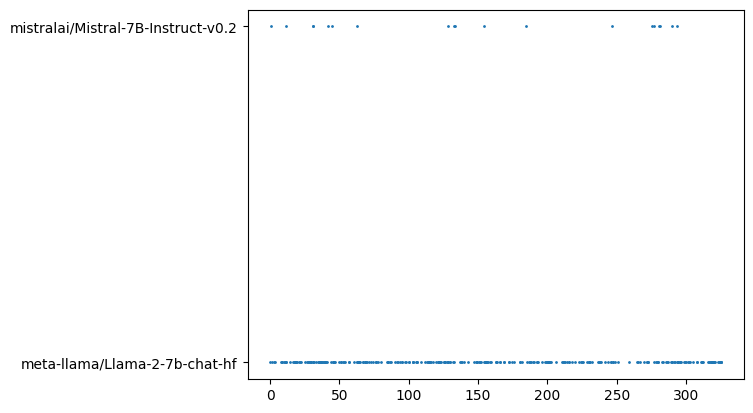

In [ ]:
req_rate = 1
cv = 1
alpha = 0.1

trace_config = get_trace_config(req_rate, cv, alpha)
trace = generate_synthetic_reqs(trace_config)
# plot the requests for each model, by arrival time
plt.scatter(
    [req.arrival_time for req in trace],
    [req.model for req in trace],
    s=1,
)

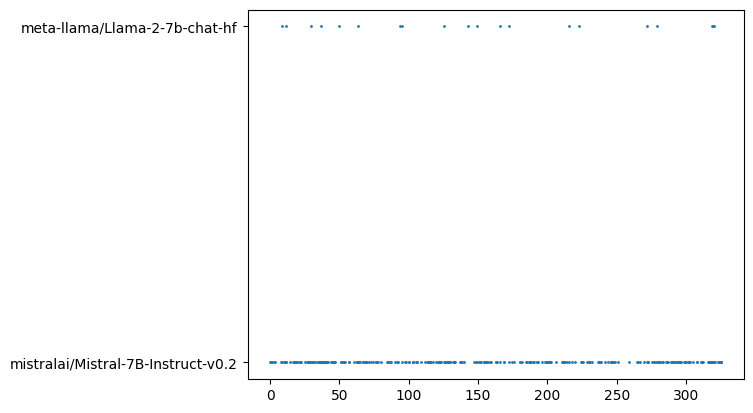

In [ ]:
req_rate = 1
cv = 1
alpha = 4

trace_config = get_trace_config(req_rate, cv, alpha)
trace = generate_synthetic_reqs(trace_config)
# plot the requests for each model, by arrival time
plt.scatter(
    [req.arrival_time for req in trace],
    [req.model for req in trace],
    s=1,
)

In [ ]:
def load_log_files(req_rate, alpha, cv, mode):
    pass

In [ ]:
swap_log  = 

SyntaxError: invalid syntax (2878283869.py, line 1)